In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from glob import glob
from matplotlib import rcParams

from src.theme import colors

# font parameters
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12

In [7]:
# results parameters
results_dir = "results/context_benchmark"

# reload results
df = pd.concat([pd.read_csv(fp) for fp in glob(os.path.join(results_dir, "*.csv"))])

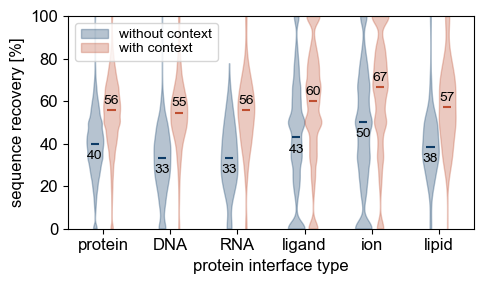

In [45]:
# plot info
keys = ['protein', 'dna', 'rna', 'ligand', 'ion', 'lipid']
labels = ['protein', 'DNA', 'RNA', 'ligand', 'ion', 'lipid']

# plot data
x = np.arange(len(keys))
ys_l = [1e2*df[(df['context_level'] == 0) & (df['binder_type'] == k)]['recovery_rate'].values for k in keys]
yc_l = [1e2*df[(df['context_level'] == 2) & (df['binder_type'] == k)]['recovery_rate'].values for k in keys]

# plot
plt.figure(figsize=(5,3))
vps = plt.violinplot(ys_l, 2*x, showextrema=False, showmedians=True, widths=0.5)
vps['cmedians'].set_edgecolor(colors[1])
for pc in vps['bodies']:
    pc.set_facecolor(colors[1])
    pc.set_edgecolor(colors[1])
vpc = plt.violinplot(yc_l, 2*x+0.5, showextrema=False, showmedians=True, widths=0.5)
vpc['cmedians'].set_edgecolor(colors[0])
for pc in vpc['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_edgecolor(colors[0])
plt.ylim(0.0, 1e2)
plt.xticks(2*x+0.25, labels)
for i in range(len(ys_l)):
    mys = np.median(ys_l[i])
    myc = np.median(yc_l[i])
    plt.text(2*x[i], mys-5.0, '{:.0f}'.format(mys), va='center_baseline', ha='center', size=10)
    plt.text(2*x[i]+0.5, myc+5.0, '{:.0f}'.format(myc), va='center_baseline', ha='center', size=10)
legends = [
    (mpatches.Patch(color=vps["bodies"][0].get_facecolor().flatten()), "without context"),
    (mpatches.Patch(color=vpc["bodies"][0].get_facecolor().flatten()), "with context"),
]
plt.legend(*zip(*legends), loc="upper left", prop={'size': 10}, labelspacing=0.1)
plt.xlabel("protein interface type")
plt.ylabel("sequence recovery [%]")
plt.tight_layout()
plt.savefig("graphs/sequence_recovery_interfaces_violin.svg")
plt.show()

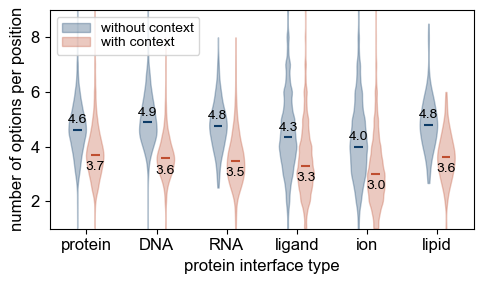

In [46]:
# plot info
keys = ['protein', 'dna', 'rna', 'ligand', 'ion', 'lipid']
labels = ['protein', 'DNA', 'RNA', 'ligand', 'ion', 'lipid']

# plot data
x = np.arange(len(keys))
ys_l = [df[(df['context_level'] == 0) & (df['binder_type'] == k)]['average_multiplicity'].values for k in keys]
yc_l = [df[(df['context_level'] == 2) & (df['binder_type'] == k)]['average_multiplicity'].values for k in keys]

# plot
plt.figure(figsize=(5,3))
vps = plt.violinplot(ys_l, 2*x, showextrema=False, showmedians=True, widths=0.5)
vps['cmedians'].set_edgecolor(colors[1])
for pc in vps['bodies']:
    pc.set_facecolor(colors[1])
    pc.set_edgecolor(colors[1])
vpc = plt.violinplot(yc_l, 2*x+0.5, showextrema=False, showmedians=True, widths=0.5)
vpc['cmedians'].set_edgecolor(colors[0])
for pc in vpc['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_edgecolor(colors[0])
plt.ylim(1, 9)
plt.xticks(2*x+0.25, labels)
for i in range(len(ys_l)):
    mys = np.median(ys_l[i])
    myc = np.median(yc_l[i])
    plt.text(2*x[i], mys+0.4, '{:.1f}'.format(mys), va='center_baseline', ha='center', size=10)
    plt.text(2*x[i]+0.5, myc-0.4, '{:.1f}'.format(myc), va='center_baseline', ha='center', size=10)
legends = [
    (mpatches.Patch(color=vps["bodies"][0].get_facecolor().flatten()), "without context"),
    (mpatches.Patch(color=vpc["bodies"][0].get_facecolor().flatten()), "with context"),
]
plt.legend(*zip(*legends), loc="upper left", prop={'size': 10}, labelspacing=0.1)
plt.xlabel("protein interface type")
plt.ylabel("number of options per position")
plt.tight_layout()
plt.savefig("graphs/sequence_options_interfaces.svg")
plt.show()

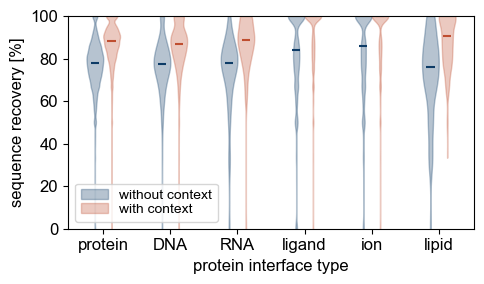

In [47]:
# plot info
keys = ['protein', 'dna', 'rna', 'ligand', 'ion', 'lipid']
labels = ['protein', 'DNA', 'RNA', 'ligand', 'ion', 'lipid']

# plot data
x = np.arange(len(keys))
ys_l = [1e2*df[(df['context_level'] == 0) & (df['binder_type'] == k)]['maximum_recovery_rate'].values for k in keys]
yc_l = [1e2*df[(df['context_level'] == 2) & (df['binder_type'] == k)]['maximum_recovery_rate'].values for k in keys]

# plot
plt.figure(figsize=(5,3))
vps = plt.violinplot(ys_l, 2*x, showextrema=False, showmedians=True, widths=0.5)
vps['cmedians'].set_edgecolor(colors[1])
for pc in vps['bodies']:
    pc.set_facecolor(colors[1])
    pc.set_edgecolor(colors[1])
vpc = plt.violinplot(yc_l, 2*x+0.5, showextrema=False, showmedians=True, widths=0.5)
vpc['cmedians'].set_edgecolor(colors[0])
for pc in vpc['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_edgecolor(colors[0])
plt.ylim(0.0, 1e2)
plt.xticks(2*x+0.25, labels)
legends = [
    (mpatches.Patch(color=vps["bodies"][0].get_facecolor().flatten()), "without context"),
    (mpatches.Patch(color=vpc["bodies"][0].get_facecolor().flatten()), "with context"),
]
plt.legend(*zip(*legends), loc="lower left", prop={'size': 10}, labelspacing=0.1)
plt.xlabel("protein interface type")
plt.ylabel("sequence recovery [%]")
plt.tight_layout()
plt.savefig("graphs/maximum_sequence_recovery_interfaces_violin.svg")
plt.show()